In [1]:
import torch
print(torch.cuda.is_available())
print(torch.__version__)

True
2.0.1+cu118


# import

In [65]:
import os
HOME = os.getcwd()
print(HOME)
import numpy as np
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image


import wandb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Setup complete  (24 CPUs, 31.9 GB RAM, 197.9/232.1 GB disk)


# cnc_box (yolo v8) (roboflow)

`-` roboflow에서 데이터 및 학습모델 가져오기

In [62]:

from roboflow import Roboflow
rf = Roboflow(api_key="KH4LEyK7llh38fCPDKsX")
project = rf.workspace("project-goyvd").project("cnc_box")
dataset = project.version(1).download("yolov8")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to cnc_box-1 in yolov8:: 100%|██████████| 218/218 [00:00<00:00, 2746.01it/s]


`-` test

In [63]:
%cd {HOME}

model.predict("f_1_3 (2).jpg", confidence=40, overlap=30).save("prediction2.jpg")


C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


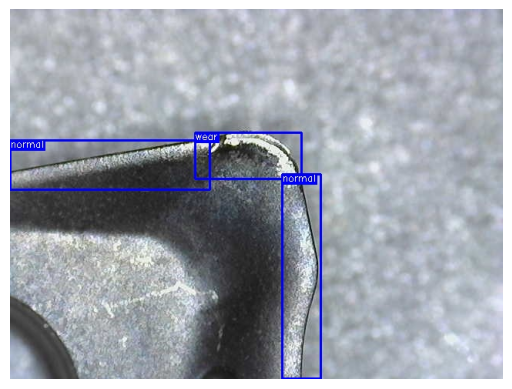

In [67]:
# 이미지 파일 경로
image_path = f"{HOME}/prediction2.jpg"

# 이미지 파일 로드
image = mpimg.imread(image_path)

# 이미지 표시
plt.imshow(image)
plt.axis("off")  # 축 표시 제거
plt.show()

# yolov8 Objectdection + Segmentation

`-` wandb 로그인

In [8]:
wandb.login()

wandb: Currently logged in as: potatopotato (expect). Use `wandb login --relogin` to force relogin


True

## train

In [9]:
HOME

'C:\\Users\\31083\\Documents\\GitHub\\Project\\CNC_YOLOV8_Segmodel\\Code\\yolo'

In [10]:
# train

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=324

C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


New https://pypi.org/project/ultralytics/8.0.138 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
yolo\engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\cnc_box-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=324, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualiz

## Train metric

C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


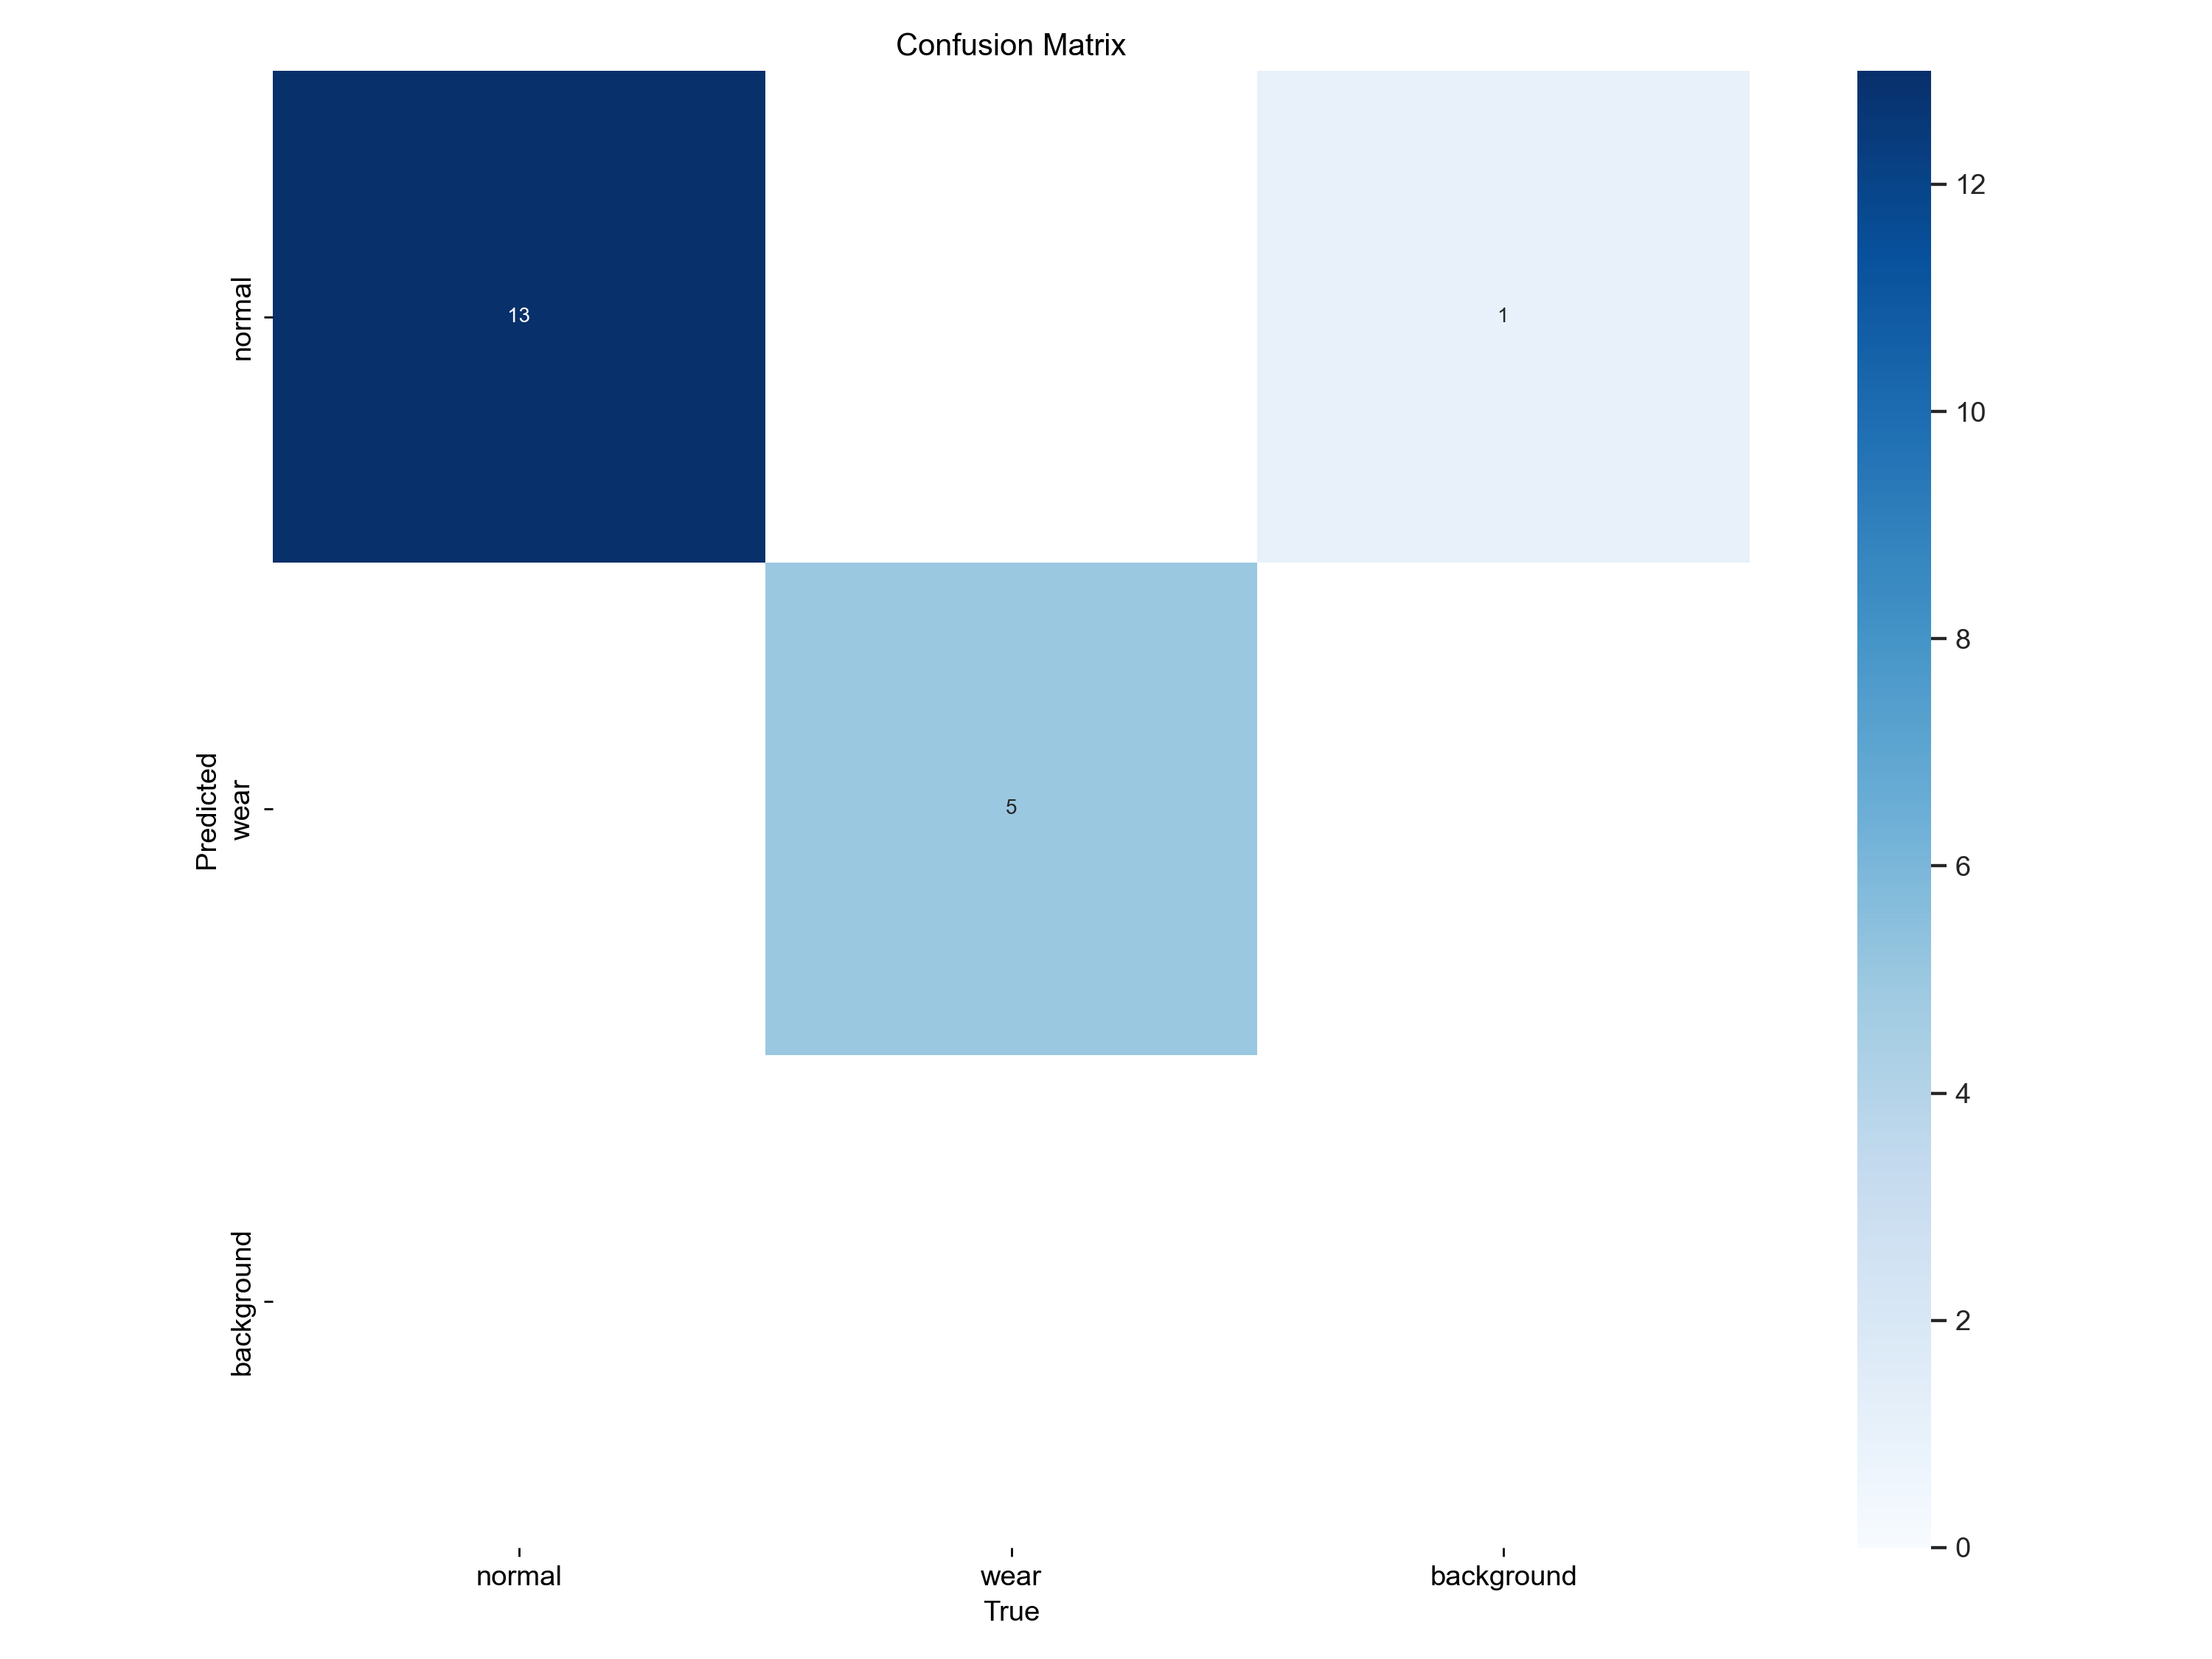

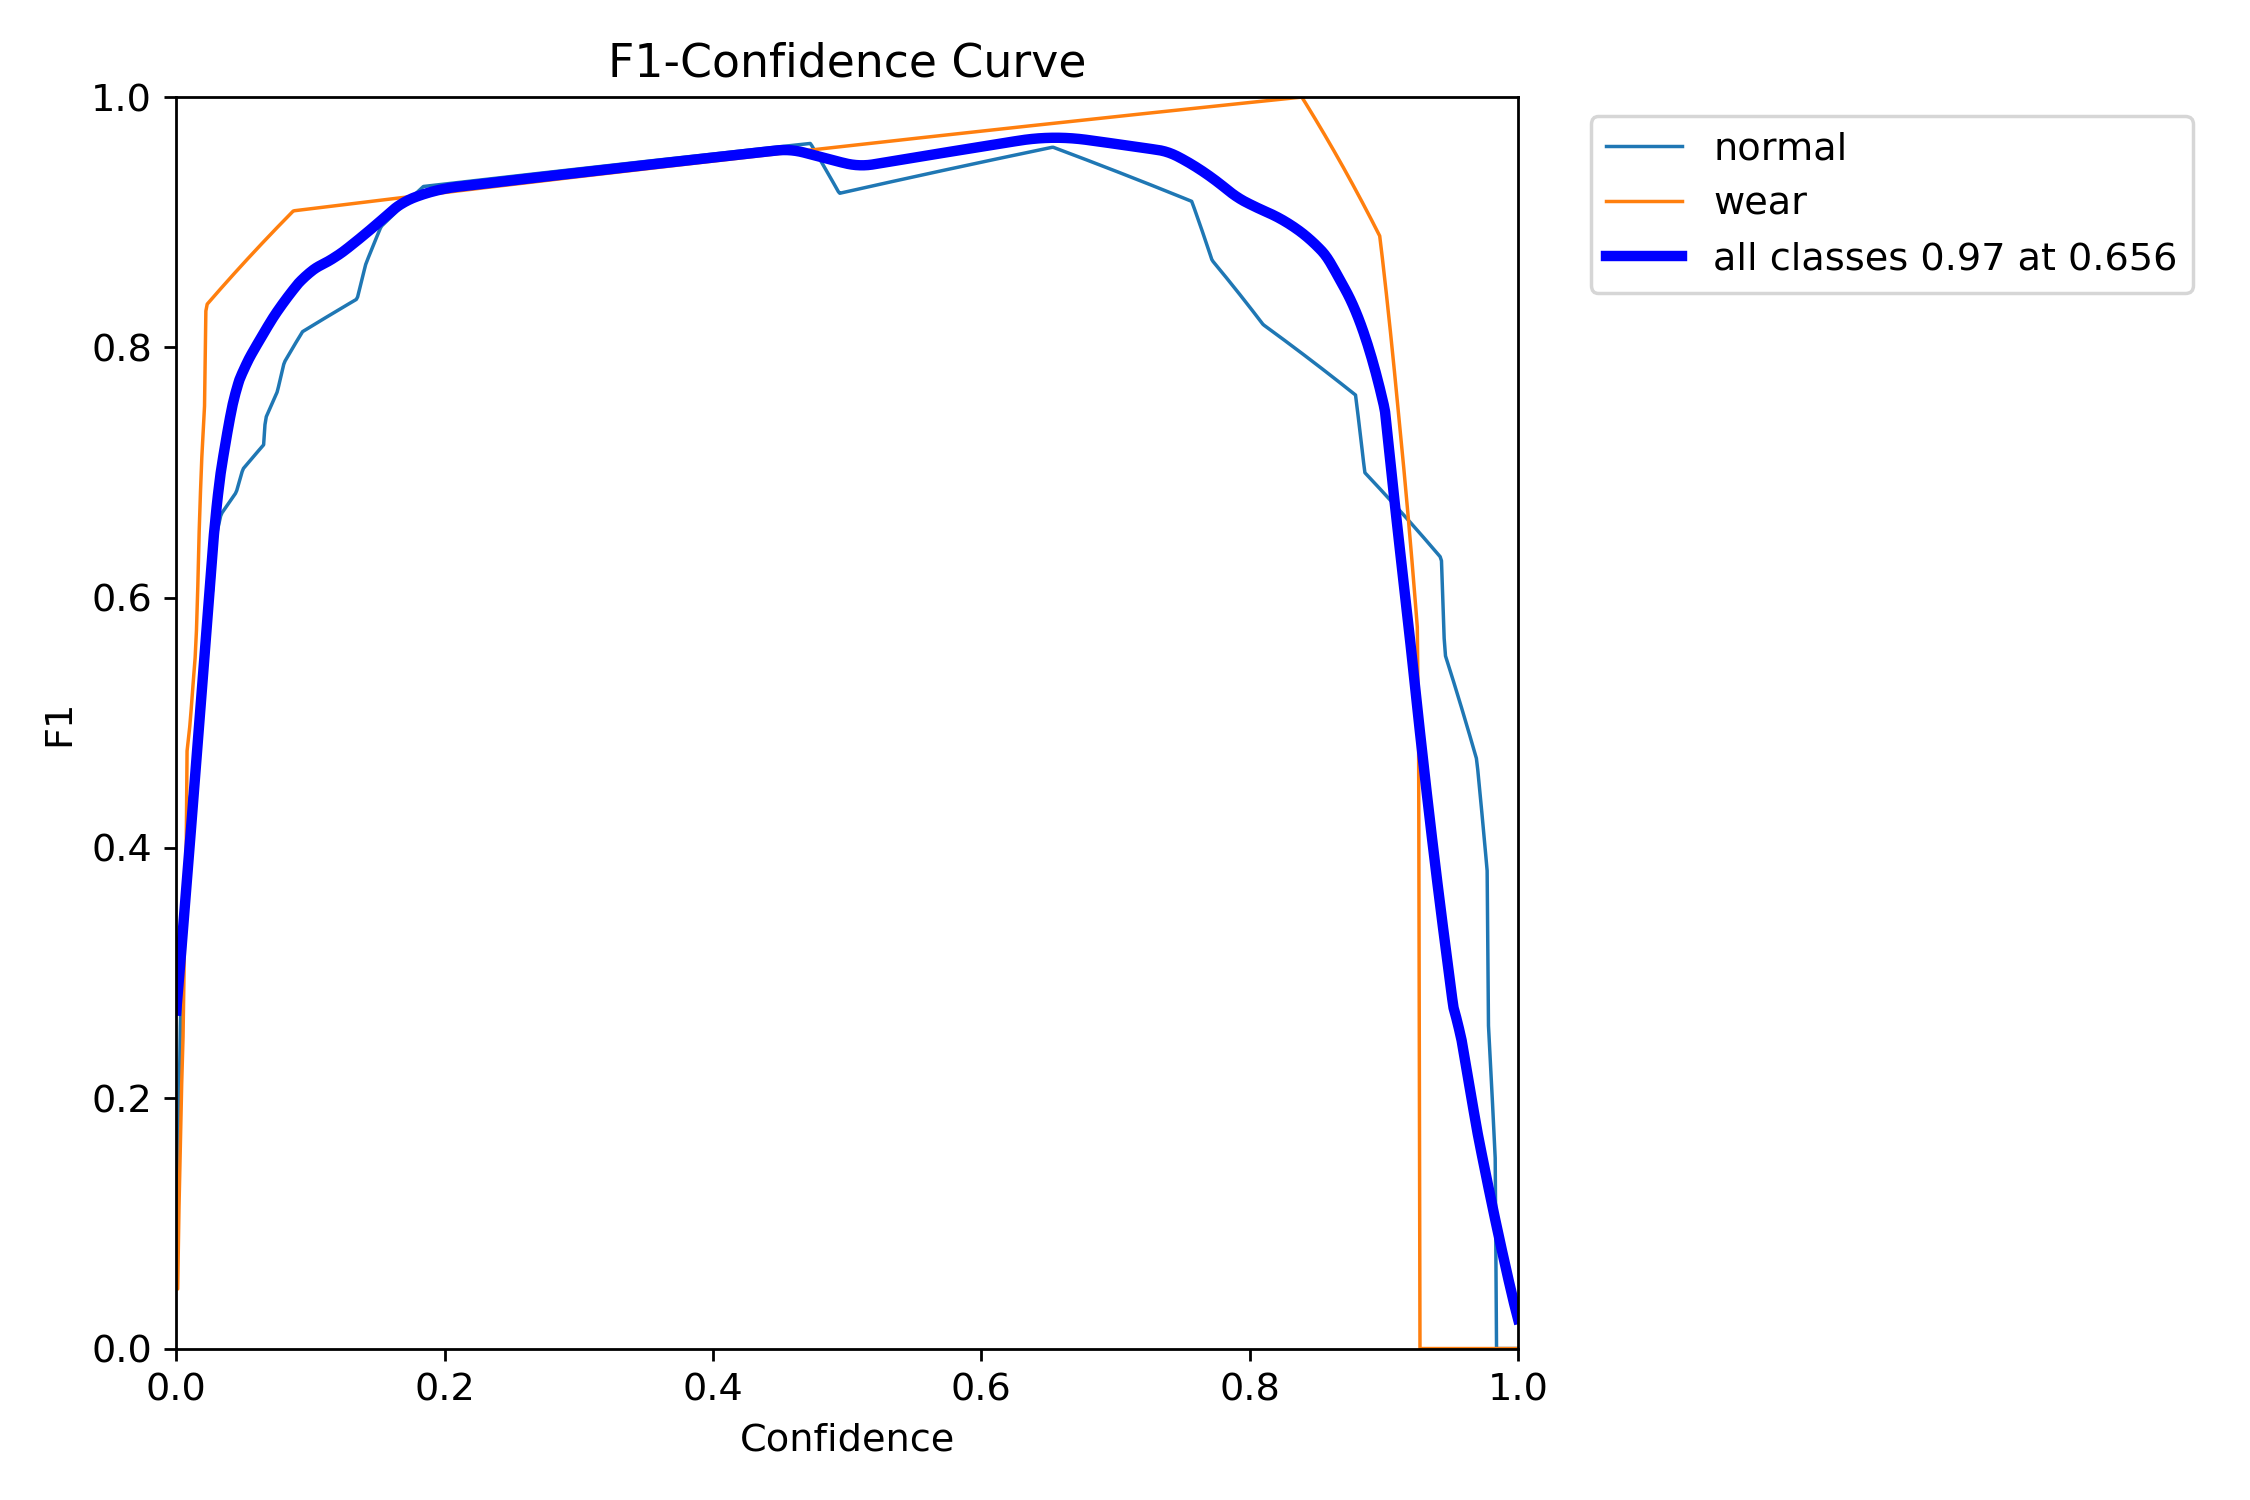

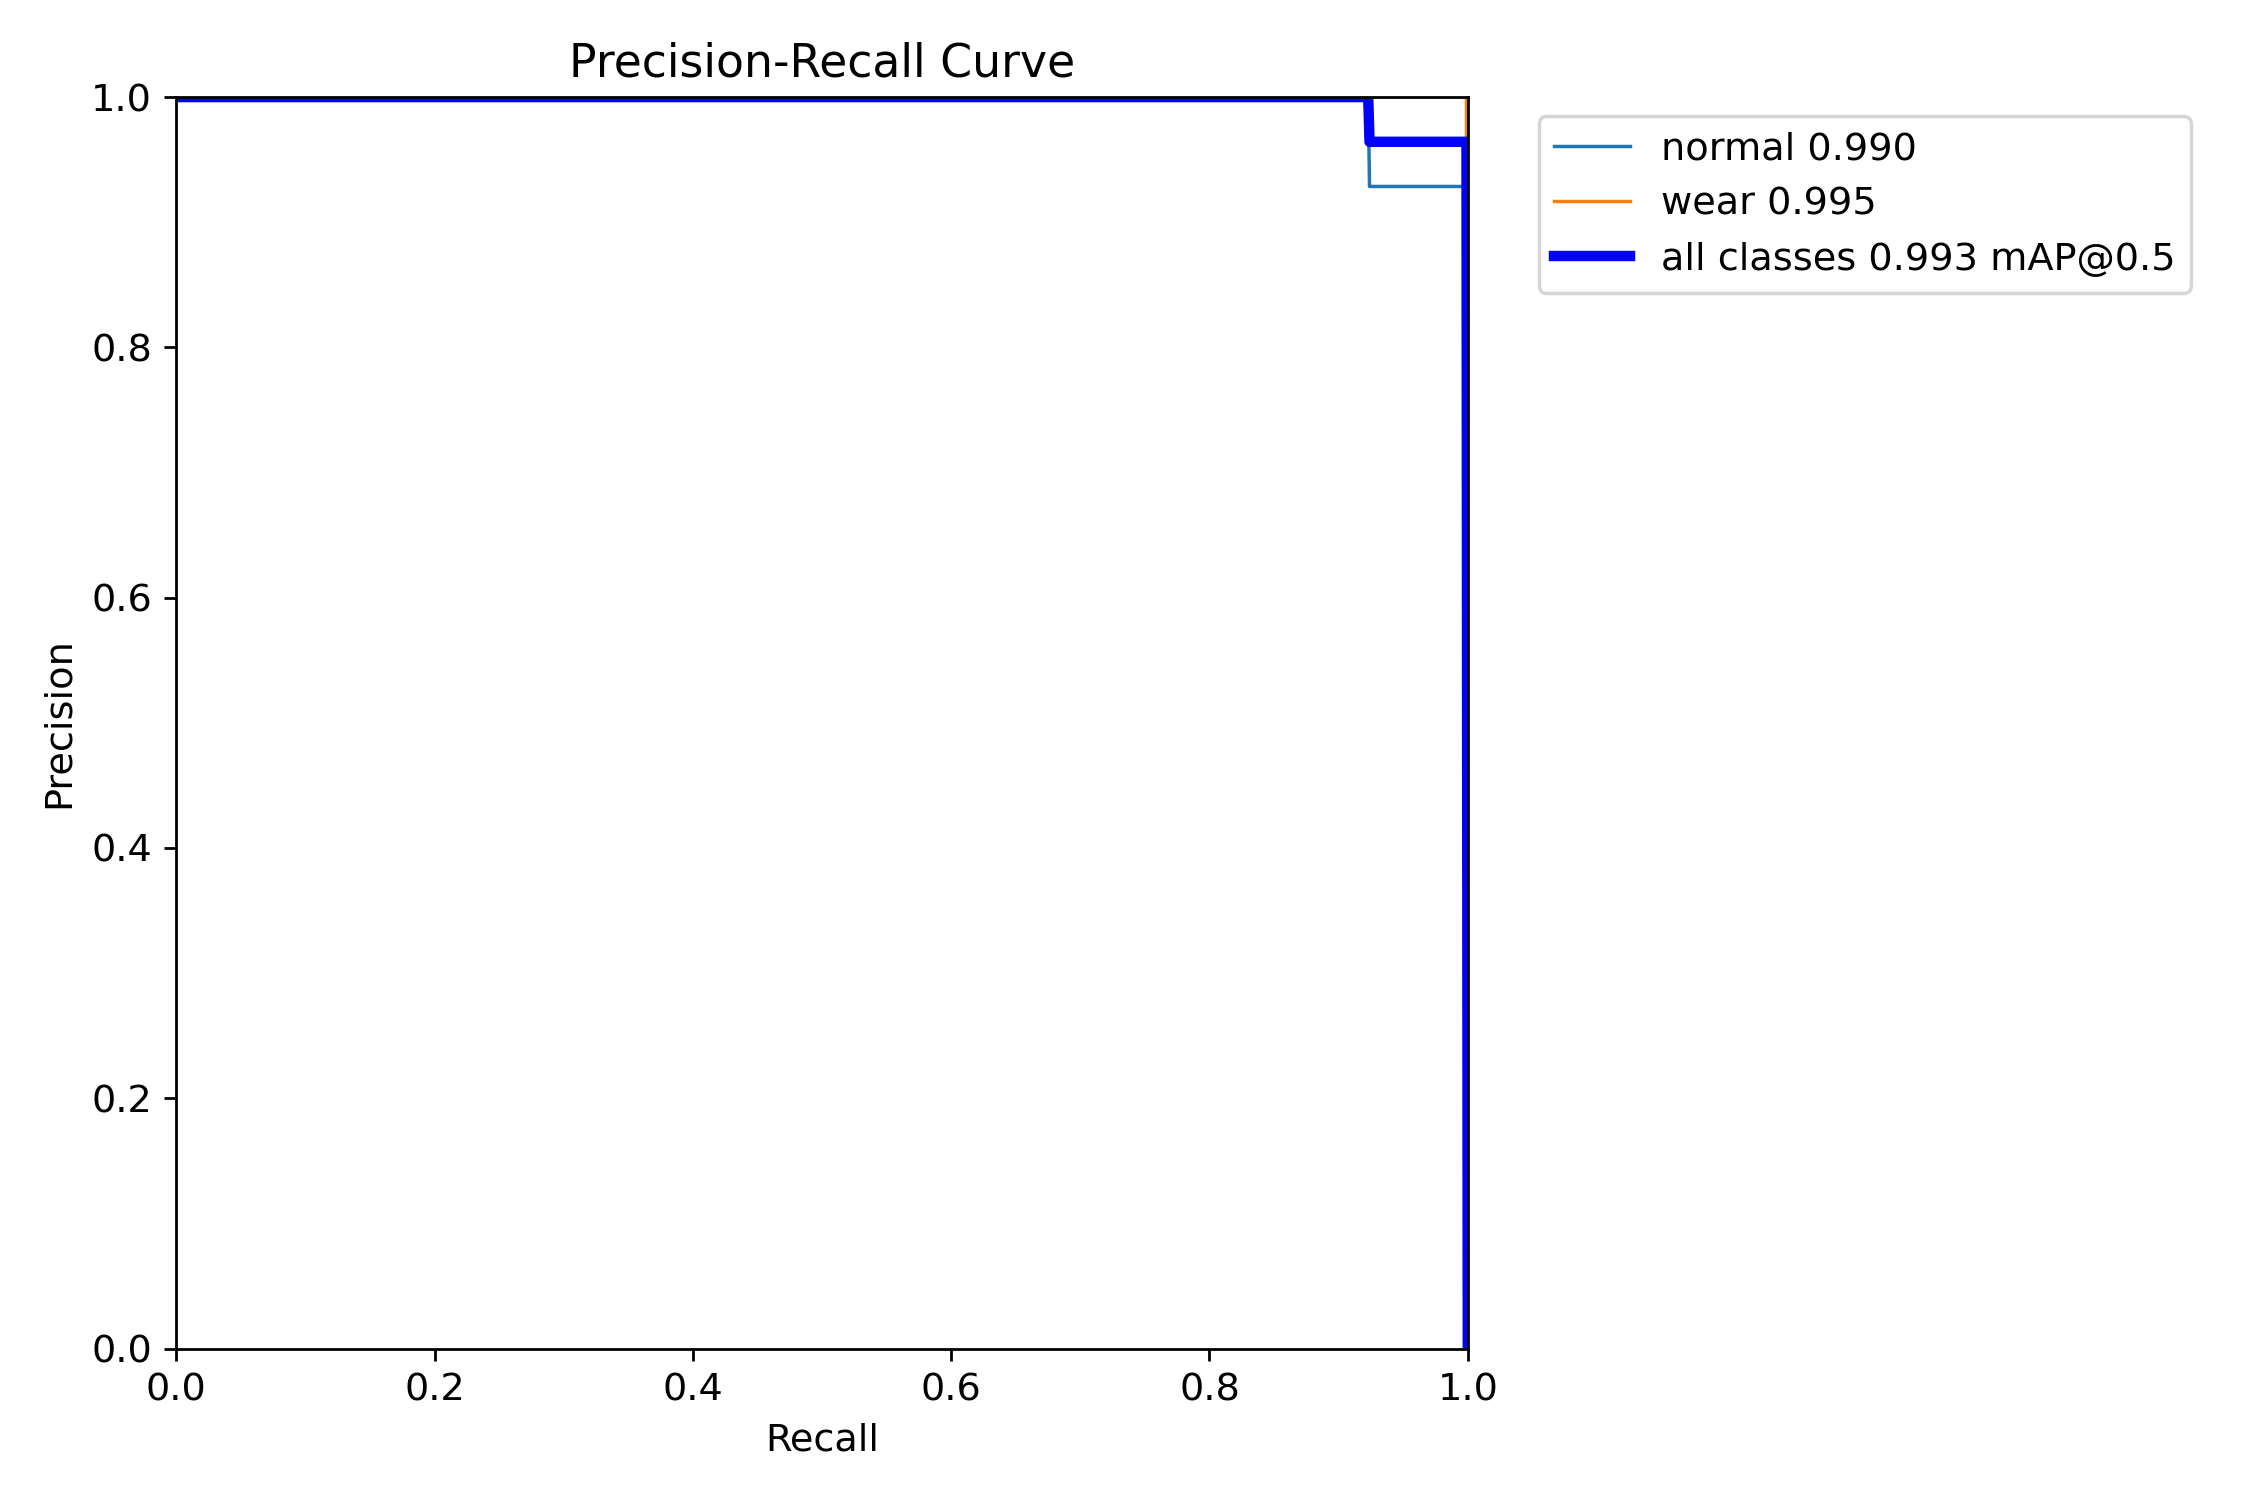

In [82]:
%cd {HOME}


image_paths = [
    f'{HOME}/runs/segment/train14/confusion_matrix.png',
   
    f'{HOME}/runs/segment/train14/MaskF1_curve.png',
    
     f'{HOME}/runs/segment/train14/MaskPR_curve.png'
]

for image_path in image_paths:
    display(Image(filename=image_path, width=2000))


## val

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train14/weights/best.pt data={dataset.location}/data.yaml

C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients

val: Scanning C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\cnc_box-1\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|##########| 8/8 [00:00<?, ?it/s]
val: Scanning C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\cnc_box-1\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|##########| 8/8 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:06<00:00,  6.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-9

C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


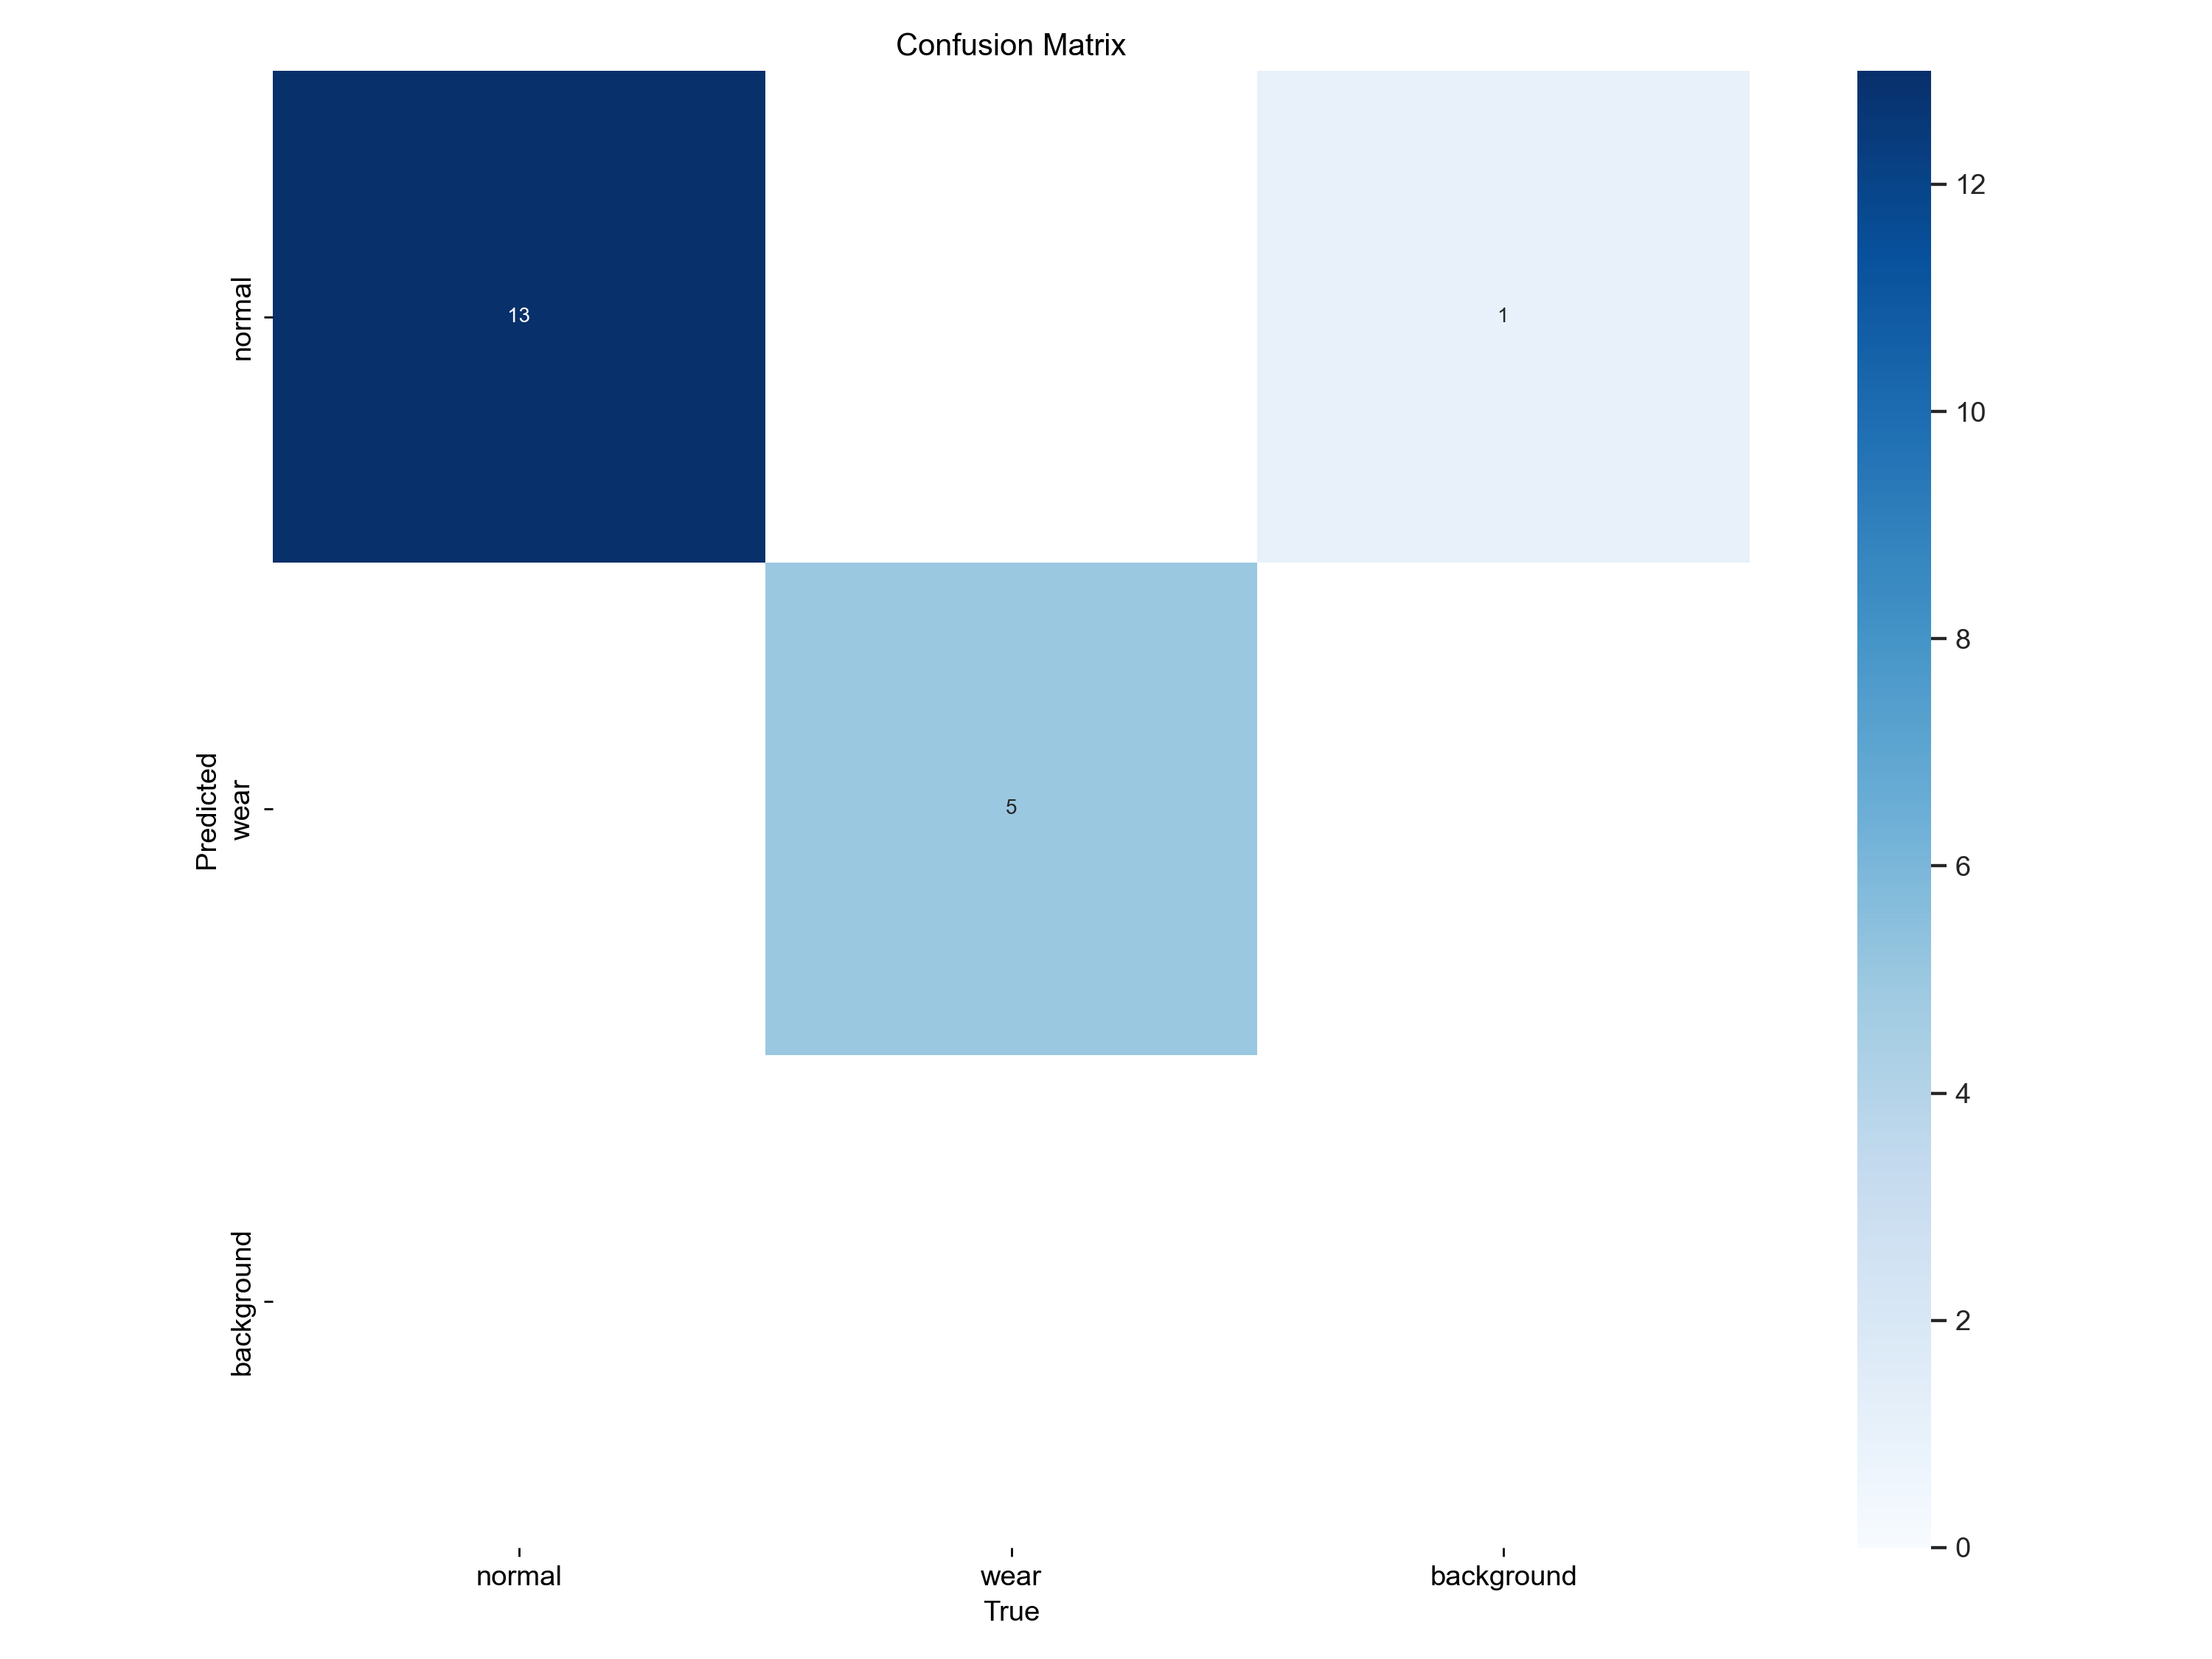

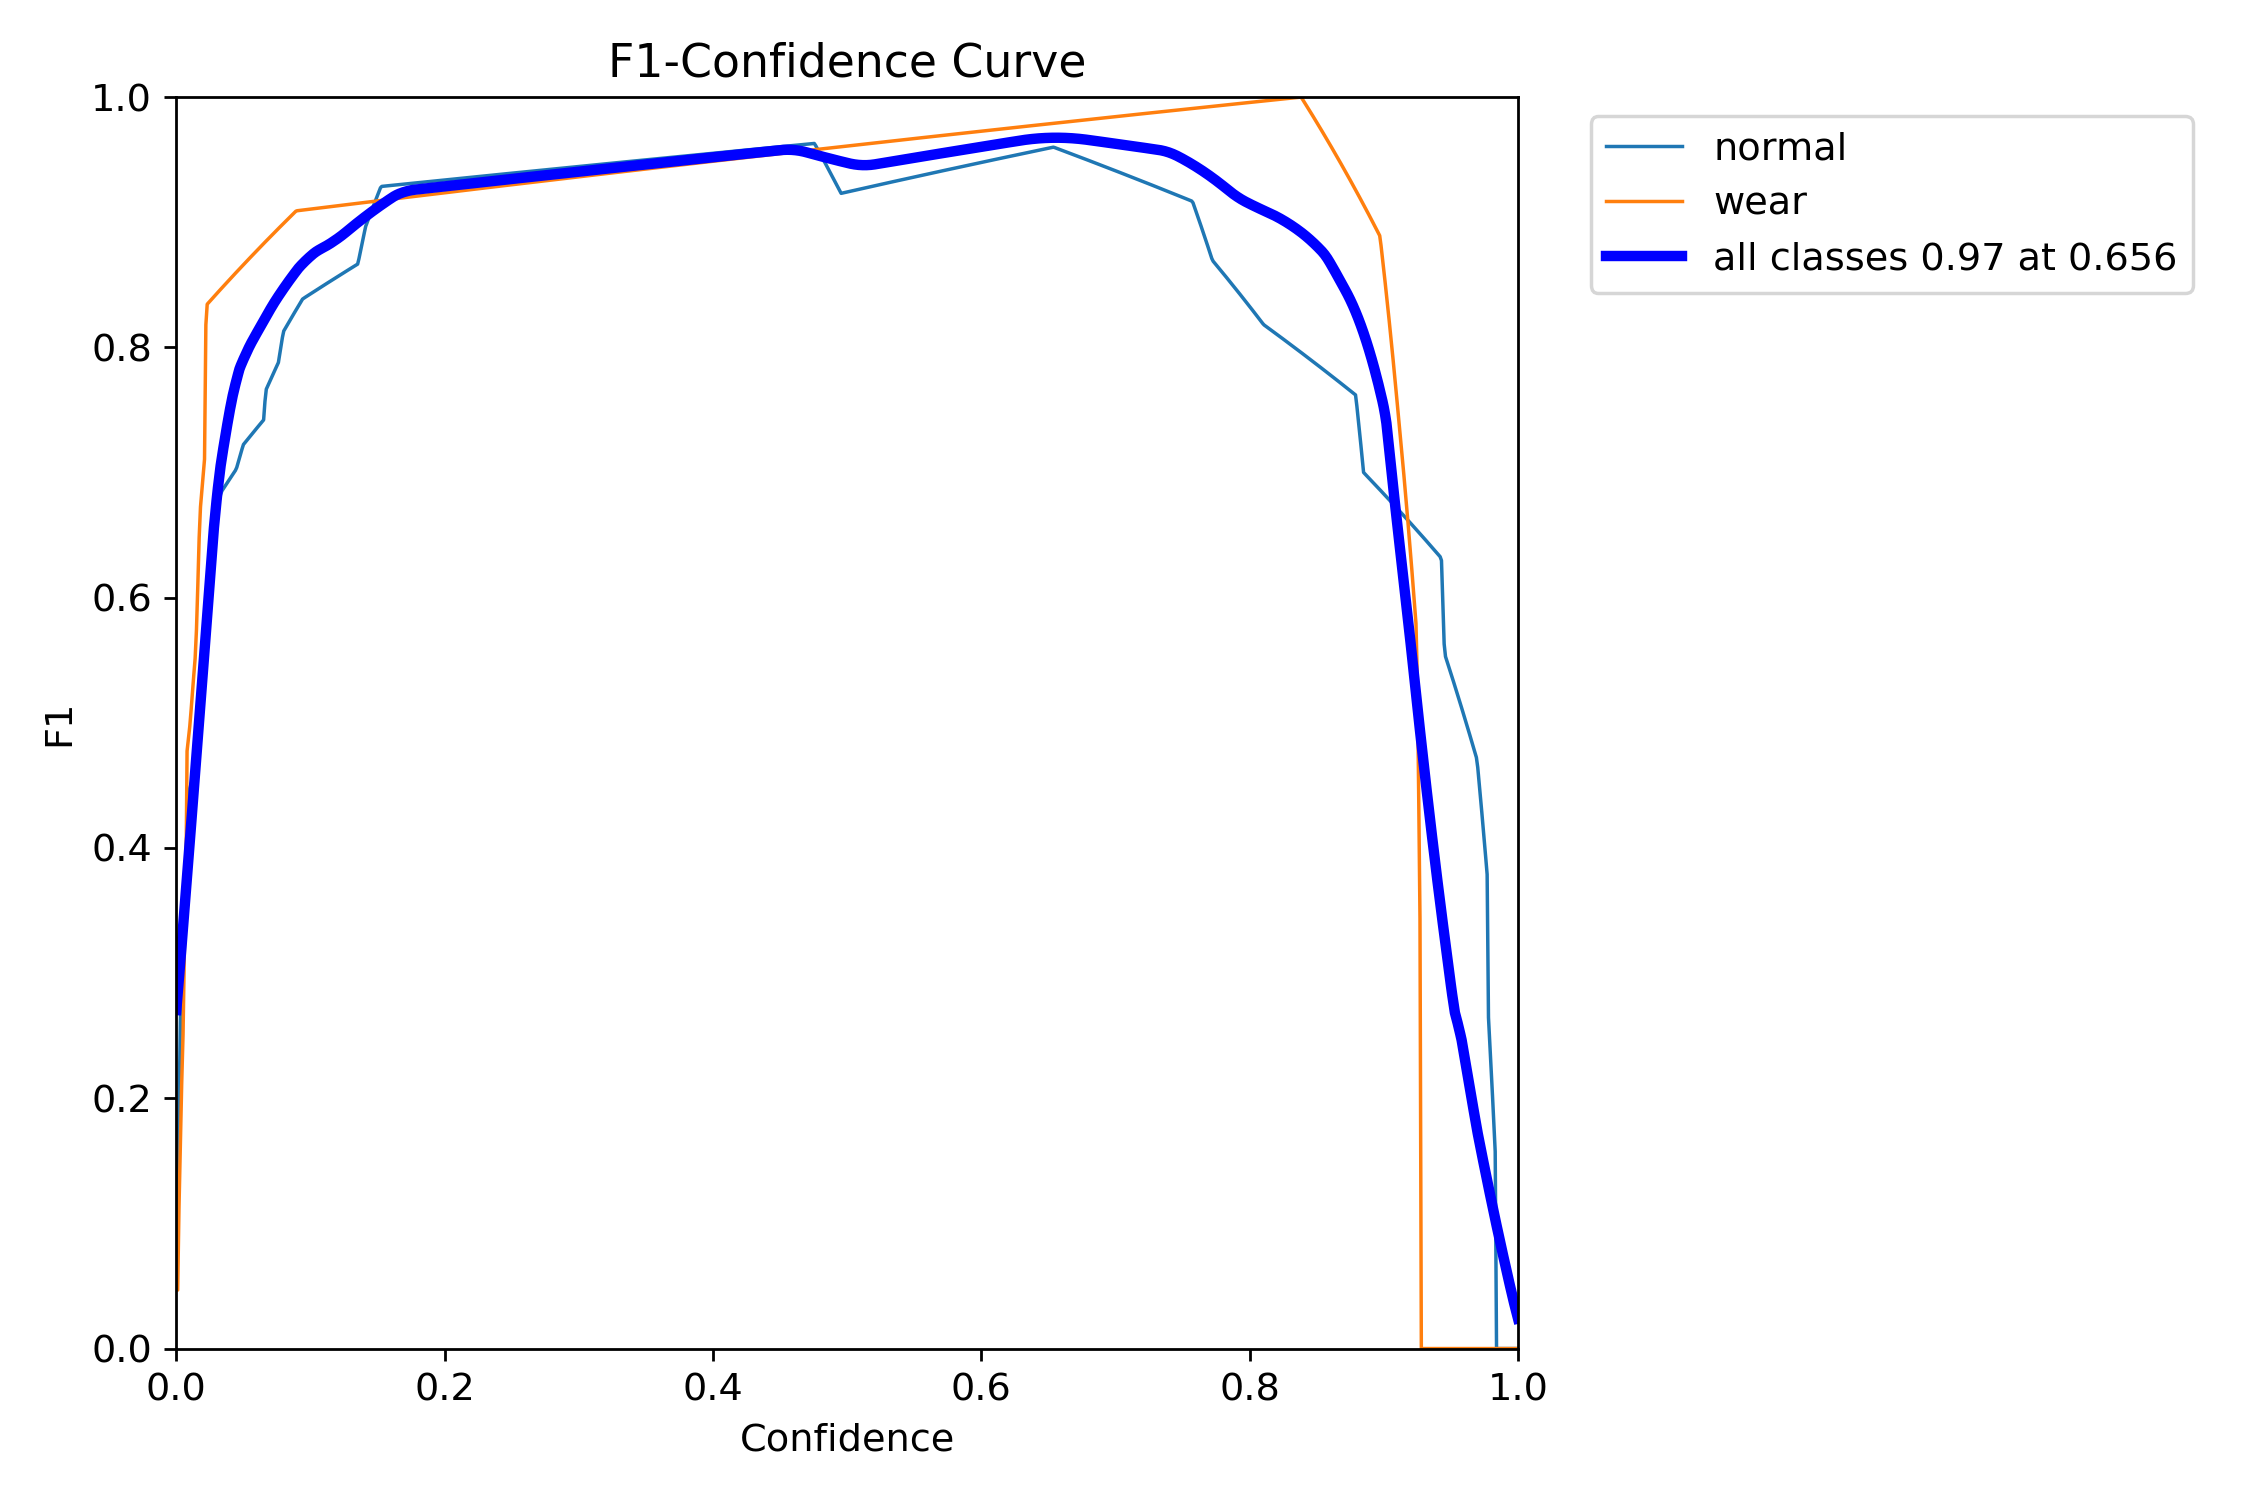

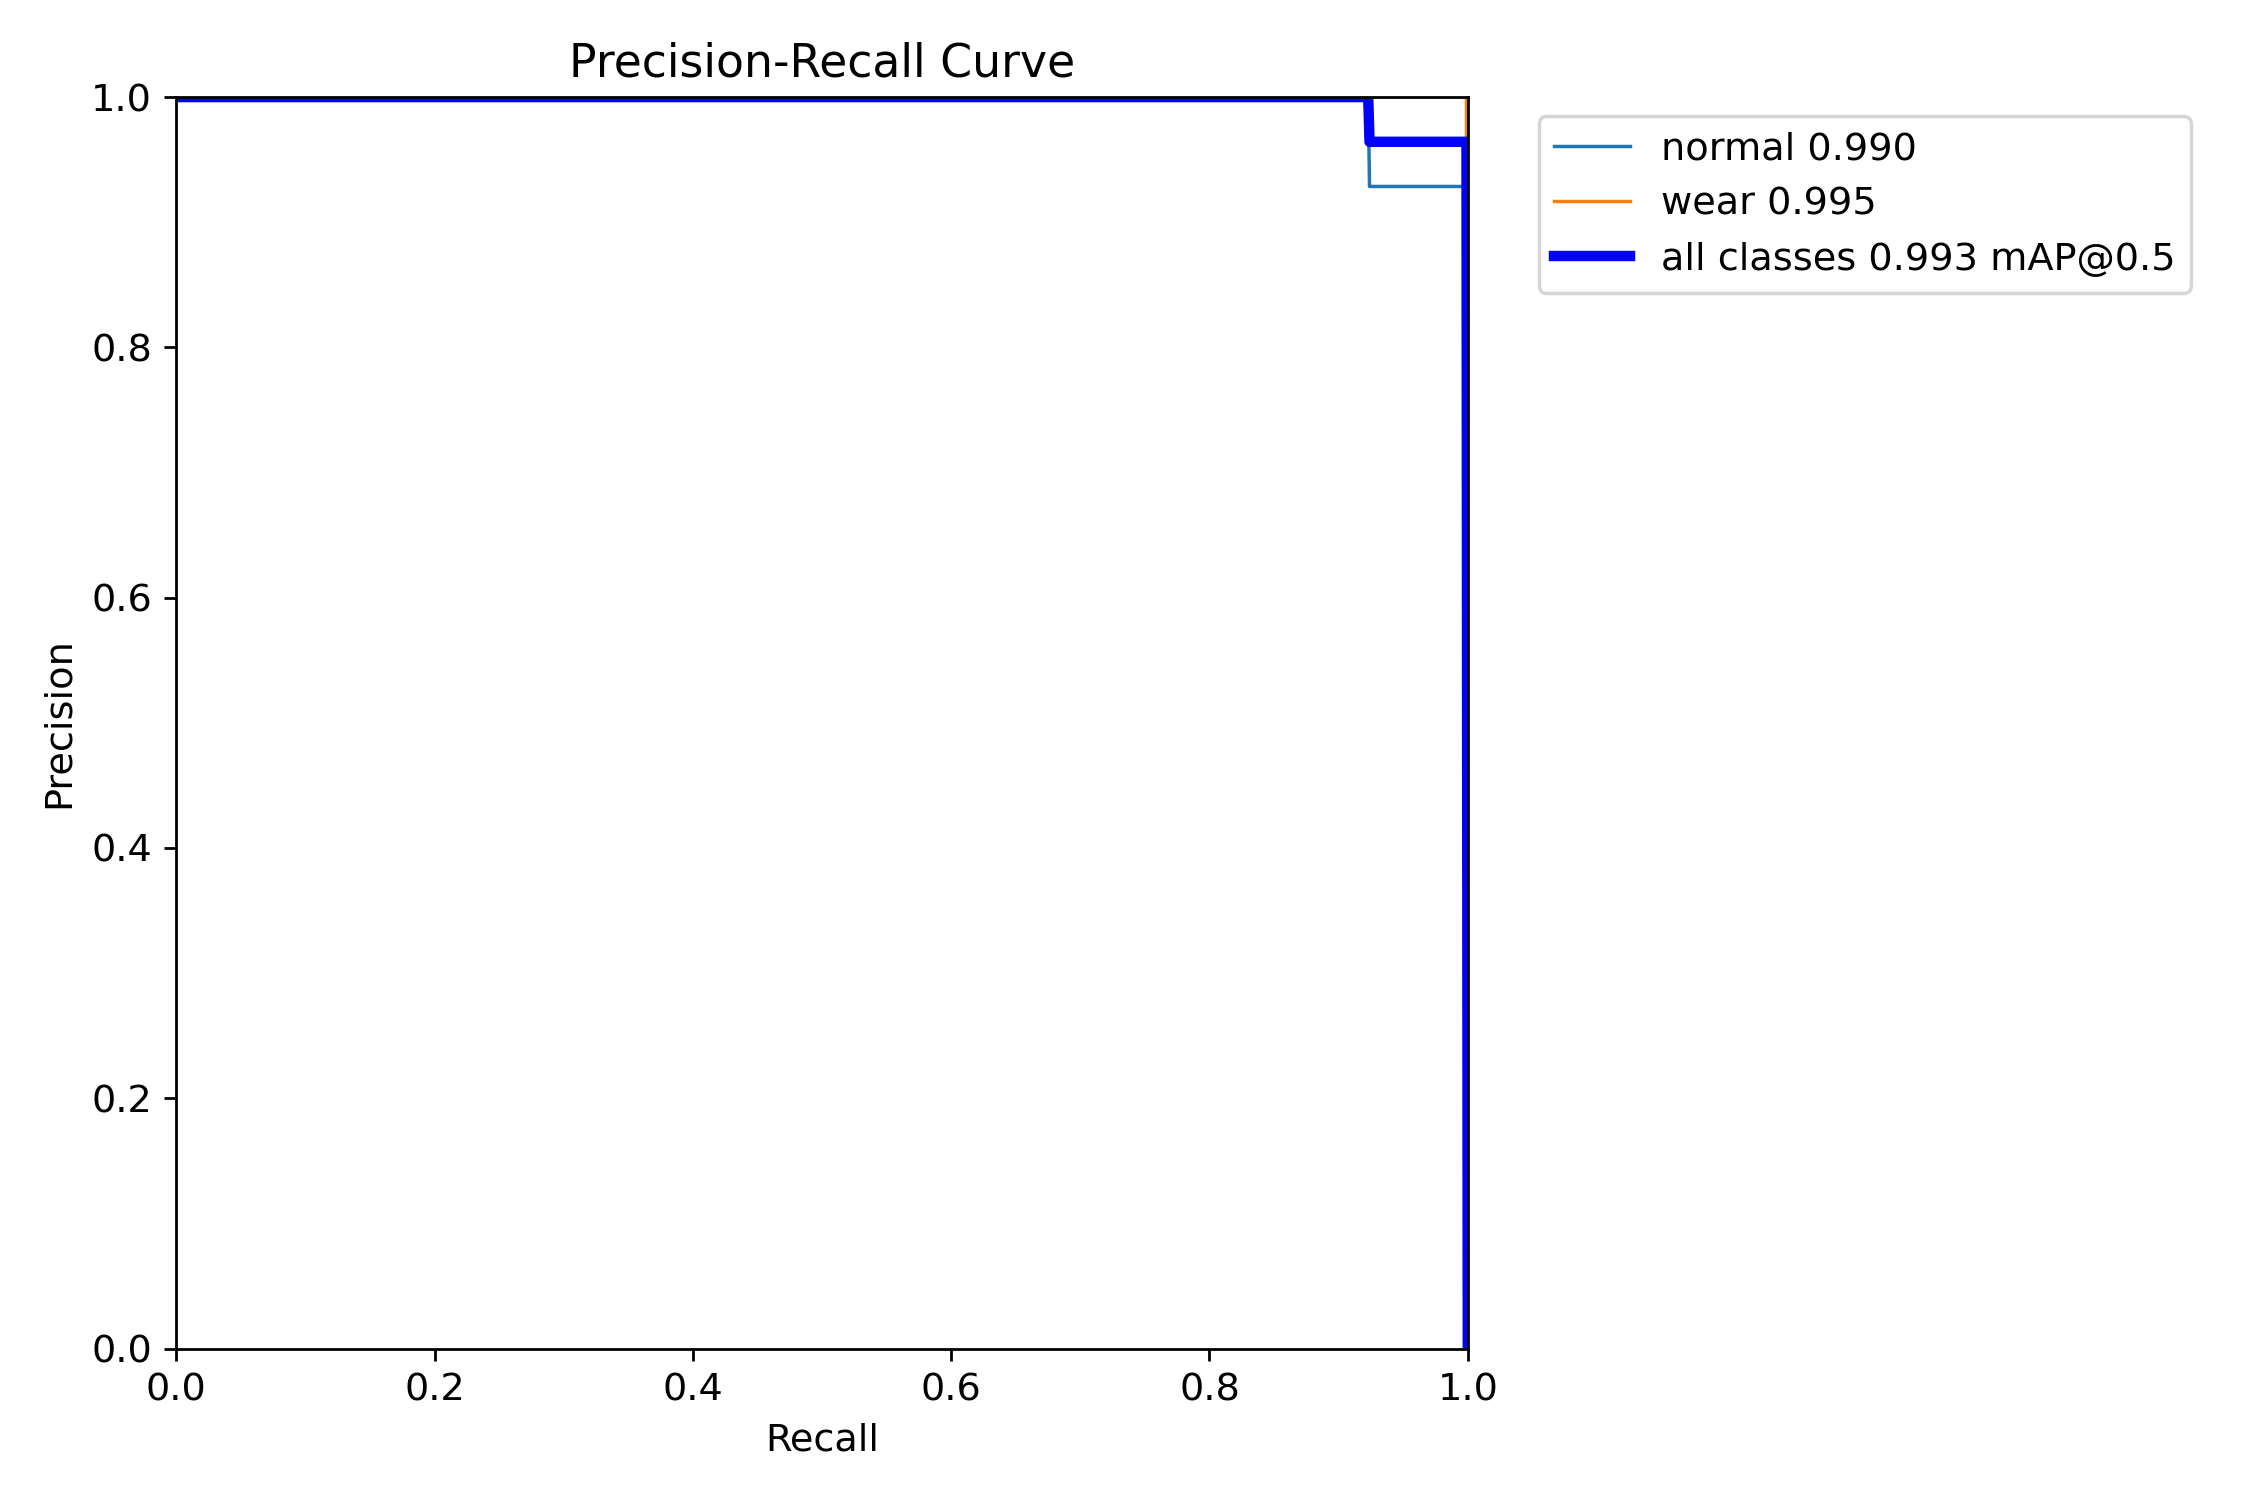

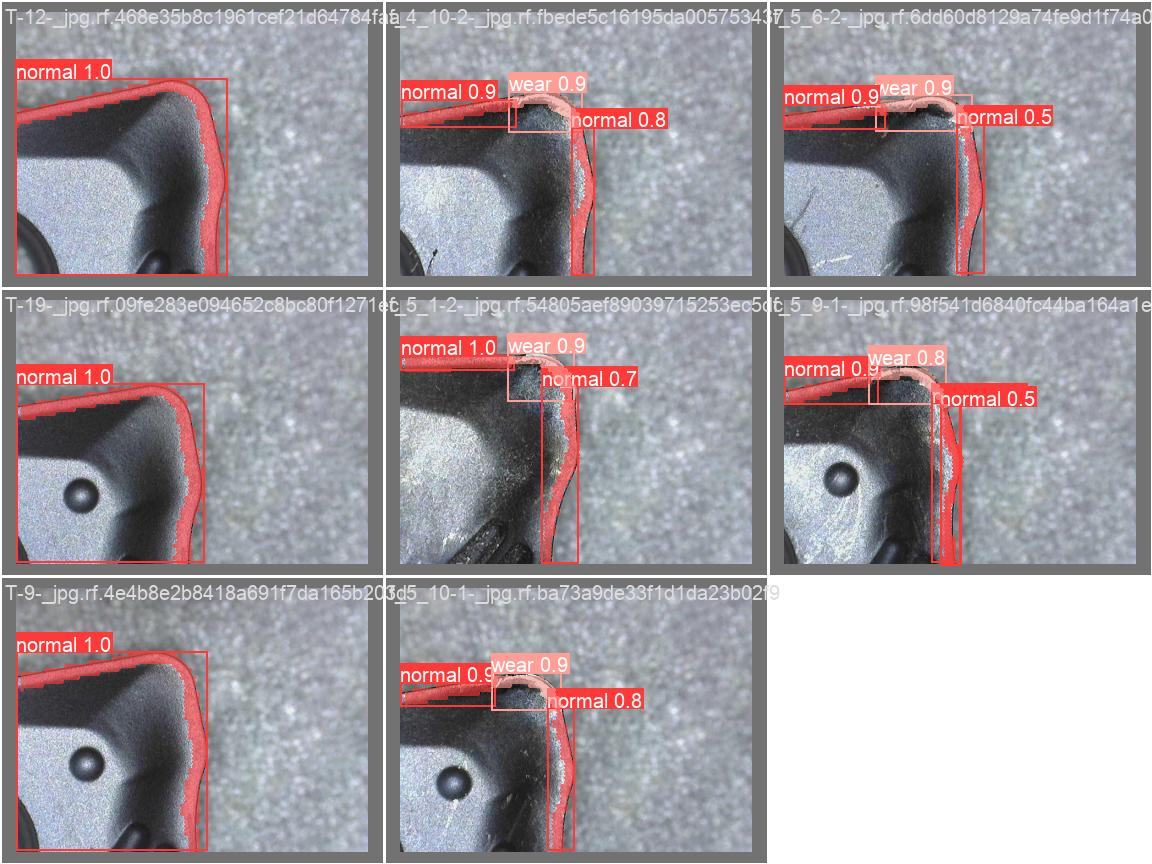

In [80]:
%cd {HOME}


image_paths = [
    f'{HOME}/runs/segment/val3/confusion_matrix.png',
   
    f'{HOME}/runs/segment/val3/MaskF1_curve.png',
     f'{HOME}/runs/segment/val3/MaskPR_curve.png',
    
    f'{HOME}/runs/segment/val3/val_batch0_pred.jpg'
]

for image_path in image_paths:
    display(Image(filename=image_path, width=2000))

## predict

In [88]:


%cd {HOME}
!yolo task=segment mode=predict model= C:/Users/31083/Documents/GitHub/Project/CNC_YOLOV8_Segmodel/Code/yolo/runs/segment/train14/weights/best.pt conf=0.50 source={HOME}/test save=true



C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo


Ultralytics YOLOv8.0.109  Python-3.9.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients

image 1/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_1 (1).jpg: 288x352 2 normals, 1 wear, 39.5ms
image 2/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_1 (2).jpg: 288x352 1 normal, 10.0ms
image 3/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_2 (1).jpg: 288x352 2 normals, 1 wear, 0.0ms
image 4/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_2 (2).jpg: 288x352 3 normals, 1 wear, 15.6ms
image 5/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_3 (1).jpg: 288x352 2 normals, 1 wear, 15.6ms
image 6/80 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\test\f_1_3 (2).jpg: 288x352 2 normals, 1 wear, 0.0ms
image 7/80 C:\Users\

## predict_result

In [85]:
from PIL import Image
import cv2

In [89]:
predict_result_path = r"C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\runs\segment\predict4"

predict_image_files = os.listdir(predict_result_path)

predict_images = []
for file_name in predict_image_files:
    file_path = os.path.join(predict_result_path, file_name)
    image = Image.open(file_path)
    # PIL 이미지를 OpenCV 형식으로 변환 (선택 사항)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    predict_images.append(image)


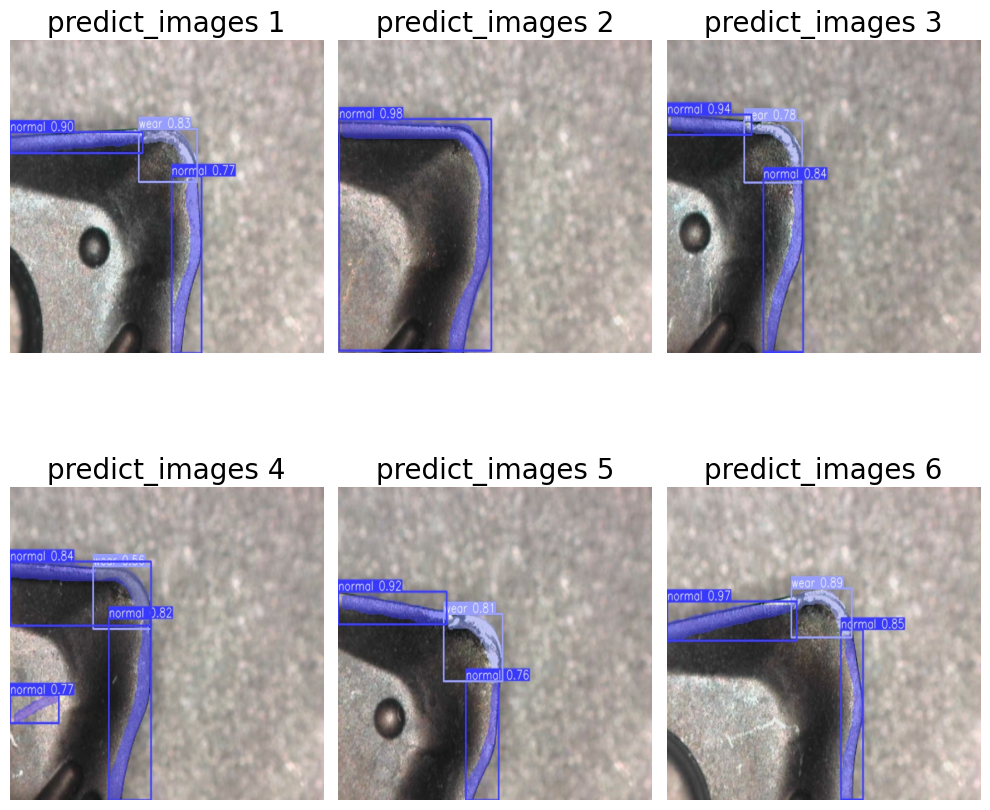

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

# 이미지 개수에 맞춰 서브플롯에 이미지 표시
for i in range(len(predict_images)):
    row = i // 3
    col = i % 3
    
    if i >= 6:
        break
    
    axes[row, col].imshow(predict_images[i], extent=[0, 10, 0, 10])
    axes[row, col].set_title(f'predict_images {i+1}',fontsize=20)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 마모도 정량화

`-` 마모로 판단된 픽셀의 수를 카운트하여 마모도를 정량화!

In [44]:
# Load a model

model = YOLO(fr'{HOME}\runs\segment\train14\weights\best.pt')  # load a custom model


In [45]:
#모델의 결과값 및 라벨값 저장

result = model.predict(f'{HOME}/f_3_7 (2).jpg',save_txt = True,save = True)



image 1/1 C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\yolo\f_3_7 (2).jpg: 288x352 2 normals, 1 wear, 48.2ms
Speed: 0.0ms preprocess, 48.2ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 352)
Results saved to runs\segment\predict2
1 label saved to runs\segment\predict2\labels


In [53]:
import pandas as pd

# 텍스트 파일 경로
file_path = f'{HOME}\\runs\\segment\\predict2\\labels\\f_3_7 (2).txt'

# 텍스트 파일 불러오기
with open(file_path, 'r') as f:
    lines = f.readlines()

# 데이터 추출
data = []
label = None

for line in lines:
    line = line.strip()
    if line.startswith('0') or line.startswith('1'):
        if label is not None and values:
            data.append([label] + values)
        label_values = line.split()
        label = int(label_values[0])
        values = [float(value) for value in label_values[1:]]
    else:
        values.extend([float(value) for value in line.split()])

# 마지막 라벨에 대한 값 추가
if label is not None and values:
    data.append([label] + values)

# 데이터 프레임 생성
df = pd.DataFrame(data)

In [54]:
df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,0,0.136364,0.363636,0.133523,0.367424,0.122159,0.367424,0.119318,0.371212,0.113636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.346591,0.333333,0.343750,0.337121,0.323864,0.337121,0.321023,0.340909,0.321023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.511364,0.500000,0.508523,0.503788,0.497159,0.503788,0.491477,0.511364,0.491477,...,0.522727,0.522727,0.522727,0.515152,0.519886,0.511364,0.519886,0.507576,0.514205,0.5


In [55]:
df_0 = df[df[0] == 0]
df_1 = df[df[0] == 1]

label_0  = df_0[0]
df_0.index = label_0

label_1  = df_1[0]
df_1.index = label_1


df_0 = df_0.transpose()
df_1 = df_1.transpose()

df_0 = df_0.drop(df_0.index[0])
df_1 = df_1.drop(df_1.index[0])

print(df_0)
print(df_1)

0           0         0
1    0.136364  0.511364
2    0.363636  0.500000
3    0.133523  0.508523
4    0.367424  0.503788
5    0.122159  0.497159
..        ...       ...
222       NaN  0.511364
223       NaN  0.519886
224       NaN  0.507576
225       NaN  0.514205
226       NaN  0.500000

[226 rows x 2 columns]
0           1
1    0.346591
2    0.333333
3    0.343750
4    0.337121
5    0.323864
..        ...
222       NaN
223       NaN
224       NaN
225       NaN
226       NaN

[226 rows x 1 columns]


In [59]:
df_1

,1
1,0.346591
2,0.333333
3,0.343750
4,0.337121
5,0.323864
...,...
222,NaN
223,NaN
224,NaN
225,NaN


In [60]:
#정상으로 탐지된 개수
nor = df_0.count().sum()
print('normal :',nor)

#마모으로 탐지된 개수
wear = df_1.count().sum()
print('wear :', wear)

# 마모의 비율.
print(f"Wear Ratio: {round(wear/(nor+wear),3) * 100}%")

normal : 354
wear : 128
Wear Ratio: 26.6%
